# Exploratory Data Analysis

This project uses a dataset with specific measured parameters that may influence the purchase outcome from users. We will try to incorporate any finding to business insight that may be used to optimize ad deployment based on refined criteria.

* Determine if there are correlations between Purchased frequency and parameters measured (Gender, Age, Estimated Salary). Determine if more data is necessary or if specific data has more relevenace to purchase frequency.

* Determine if there is a statistically relevant correlation between measured values and their impact on purchases. 

* Create a regression model using machine learning to predict purchase outcome from paramaters. Decide what is needed for improvement and optimization for ad deployment success. 

In [602]:
# imports

import pandas as pd
import numpy as np
% pylab inline
import operator
import re
from collections import OrderedDict
import seaborn as sns
import pickle
import os.path
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
from matplotlib import rc
from pylab import rcParams
from sklearn import preprocessing
import pylab as pl
%matplotlib inline
import math
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [603]:
# Importing the dataset
df = pd.read_csv('Social_Network_Ads.csv')

In [604]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


From the data we can see that there are only 400 rows of data, this may prove insufficient to our predicitons. We will still be able to determine what can be predicted or improved upon with addition of data. In cases of initial deployment this may be the case for reflective value on business insight. 

In [605]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


We can also see our column values: Gender, Age, Estimated Salary, Purchased

We will use these to determine any correlative significance on Purchased. We can also see that Gender is categorical and that Purchased is binary. We can see that the dependent variable that we are measuring is categorical and binary meaning logistic regression would be useful.

## Data Exploration 

We will now analyze the relationships between the variables and their impact on purchases. We will modify the dataset to better handle our analytical process. 

In [606]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [607]:
print (sum([df.Purchased == 0]))
print (sum([df.Purchased == 1]))

257
143


Total purchased is 143 whereas non-purchased is 257. We can see that 35.75%. Let's try to make a visualization for this.

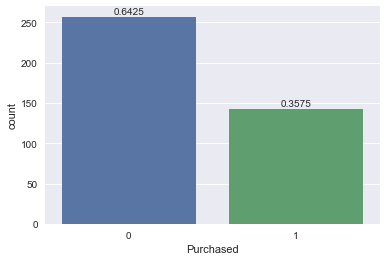

In [608]:
ax = sns.countplot(x="Purchased", data=df) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.4f}'.format(height/len(df)),
            ha="center") 
plt.show()

In [609]:
df.groupby('Purchased').mean()

,User ID,Age,EstimatedSalary
Purchased,,,
0,1.569116e+07,32.793774,60544.747082
1,1.569222e+07,46.391608,86272.727273


We observe from the mean that both the average Age and Estimated Salary for users that Purchased is significantly higher than for non-purchased.

In [610]:
df.groupby('Gender').mean()

,User ID,Age,EstimatedSalary,Purchased
Gender,,,,
Female,1.569331e+07,38.411765,71759.803922,0.377451
Male,1.568970e+07,36.867347,67642.857143,0.336735


We can see initial observations that 37.74% of females are likely to purchase and only 33.67% of males are likely to purchase. We also see that the average Age and Estimated Salary is higher in Females than Males. 

In [611]:
df.groupby('Age').mean()

,User ID,EstimatedSalary,Purchased
Age,,,
18,1.567696e+07,66400.000000,0.000000
19,1.571065e+07,46000.000000,0.000000
20,1.569884e+07,61714.285714,0.000000
21,1.565027e+07,61000.000000,0.000000
22,1.568825e+07,48800.000000,0.000000
23,1.564283e+07,51166.666667,0.000000
24,1.569152e+07,49111.111111,0.000000
25,1.568253e+07,65166.666667,0.000000
26,1.571145e+07,53500.000000,0.000000


Observations from Age show that higher Age range is more likely to make a purchase than younger. Estimated Salary doesn't show any significance relative to Age. 

In [612]:
df.groupby('EstimatedSalary').mean()

,User ID,Age,Purchased
EstimatedSalary,,,
15000,1.572291e+07,28.250000,0.000000
16000,1.562951e+07,23.500000,0.000000
17000,1.571410e+07,27.666667,0.000000
18000,1.565260e+07,29.250000,0.000000
19000,1.565214e+07,21.500000,0.000000
20000,1.570994e+07,36.400000,0.400000
21000,1.566767e+07,35.500000,0.500000
22000,1.564976e+07,39.200000,0.400000
23000,1.565773e+07,40.142857,0.571429


Observations from Estimated Salary show that generally higher values reflect on positive outcome for purchases. Age is dispersed with no unique pattern. 

We are able to see that the total number of purchases made was 143 and non-purchases was 257. The total is verified as 400 representing our sample size.

In [613]:
GP= df[['Gender','Purchased']]
GP.head()

,Gender,Purchased
0,Male,0
1,Male,0
2,Female,0
3,Female,0
4,Male,0


Generateing a table with respect to Gender and Purchased.

In [614]:
freq= GP.pivot(columns='Gender', values= 'Purchased')
freq.head()

Gender,Female,Male
0,NaN,0.0
1,NaN,0.0
2,0.0,NaN
3,0.0,NaN
4,NaN,0.0


Separating purchases based on values.

In [615]:
freq.describe()

Gender,Female,Male
count,204.000000,196.000000
mean,0.377451,0.336735
std,0.485942,0.473804
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [616]:
pd.crosstab(GP.Gender, GP.Purchased)

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


Here we can see the number of purchases made by each gender and the quantities. We can see that there are 77 Purchases contributing to the Female purchases and 66 for the Males. 

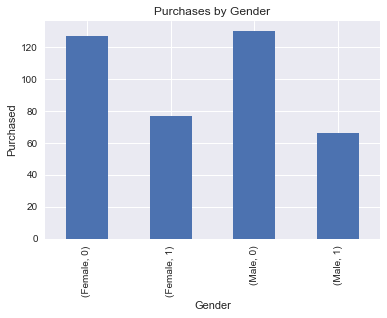

In [617]:
_= GP.groupby([GP['Gender'], GP['Purchased']]).size().plot(kind='bar')
_= plt.xlabel('Gender')
_= plt.ylabel('Purchased')
_= plt.title('Purchases by Gender')
plt.show()

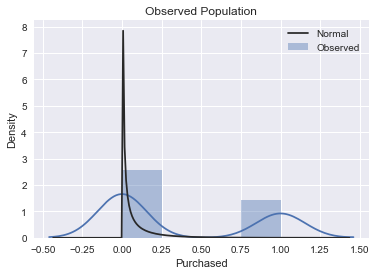

In [618]:
# CLT
_= sns.distplot(GP['Purchased'], kde=True, fit=stats.gamma)
_= plt.xlabel('Purchased')
_= plt.ylabel('Density')
_= plt.title('Observed Population')
_= plt.legend(('Normal', 'Observed'))
plt.show()

In [619]:
# Assign variable for each gender from dataset 
all_f = df[GP['Gender'] == 'Female']
all_m = df[GP['Gender'] == 'Male']

# Sample size by gender
l_f= len(all_female)
l_m= len(all_male)
print(l_f)
print(l_m)

# Samples that purchased
p_f= all_f.Purchased.sum()
p_m= all_m.Purchased.sum()

# Ratio of purchased 
P_f= p_f/l_f
P_m= p_m/l_m


print([P_f, P_m])



204
196
[0.37745098039215685, 0.336734693877551]


Since both sample sizes are different we will need to use both sample populations for further calculations. We can also observe from the calculaitons that approximately 37.75% of Females have Purchased whereas only 33.67% of Males have purchased. 

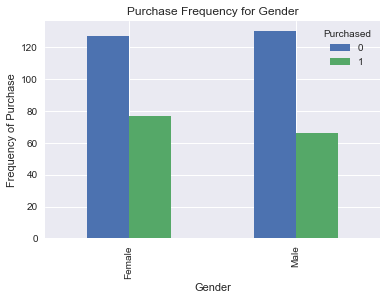

In [620]:
pd.crosstab(df.Gender,df.Purchased).plot(kind='bar')
plt.title('Purchase Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Purchase')

This visualization matches our previous observations. 

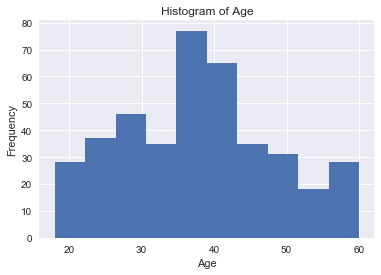

In [621]:
df.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

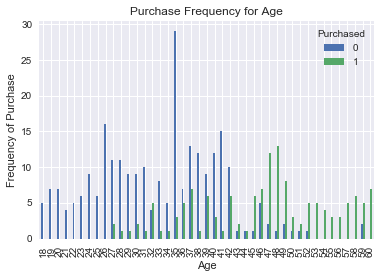

In [622]:
pd.crosstab(df.Age,df.Purchased).plot(kind='bar')
plt.title('Purchase Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Purchase')

From this barplot of Purchase Frequency for Age we can see that there are more purchases as age goes up and lack thereof from 27 below. This is also significant for non-purchases as the concentration of non-purchases is mainly with the younger populous. From the Age histogram we can see a spike in age frequency at approximately 40.

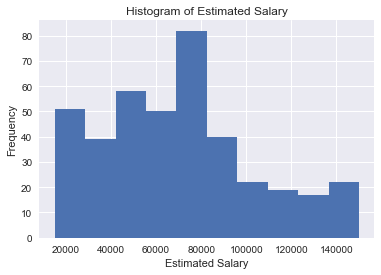

In [623]:
df.EstimatedSalary.hist()
plt.title('Histogram of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')

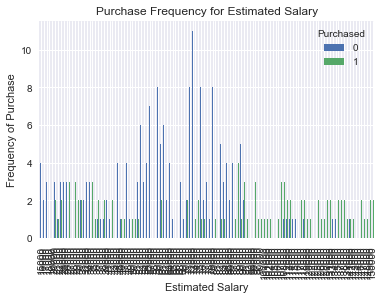

In [624]:
pd.crosstab(df.EstimatedSalary,df.Purchased).plot(kind='bar')
plt.title('Purchase Frequency for Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency of Purchase')

From Purchase Frequency for Estimated Salary we can see that the green purchase ticks have a relative even distribution. The purchase markers are throughout the plot. From the Esimated Salary histogram we can see a large density in frequency of salaries from approximately $20000 to $80000.

In [625]:
cat_vars=['Gender']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    data=data1

In [626]:
cat_vars=['Gender']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [627]:
df1=data[to_keep]
df1.columns.values

array(['User ID', 'Age', 'EstimatedSalary', 'Purchased', 'Gender_Female',
       'Gender_Male'], dtype=object)

In [628]:
data_final_vars=df1.columns.values.tolist()
y=['Purchased']
X=[i for i in data_final_vars if i not in y]

In [629]:
cols= ['Gender_Female','Gender_Male', 'Age', 'EstimatedSalary']
X= df1[cols]
y= df1['Purchased']

### T-test, Confidence intervals, ECDF

In [647]:
import scipy.stats as stats
# T-test with alpha = 0.95
stats.t.interval(alpha = 0.95,              
                 df = 400, 
                 loc= df1['Gender_Female'].mean()) 

(-1.455912343229391, 2.4759123432293908)

In [648]:
import scipy.stats as stats
# T-test with alpha = 0.95
stats.t.interval(alpha = 0.95,              
                 df = 400, 
                 loc= df1['Gender_Male'].mean()) 

(-1.475912343229391, 2.4559123432293912)

In [649]:
# T-test with alpha = 0.95
stats.t.interval(alpha = 0.95,              
                 df = 400, 
                 loc= df1['Age'].mean()) 

(35.68908765677061, 39.620912343229392)

In [650]:
# T-test with alpha = 0.95
stats.t.interval(alpha = 0.95,              
                 df = 400, 
                 loc= df1['EstimatedSalary'].mean()) 

(69740.534087656764, 69744.465912343236)

In [651]:
mean, sigma = np.mean(df1['Gender_Female']), np.std(df1['Gender_Female'])
conf_int_a = stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int_b = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(df1['Gender_Female'])))

conf_int_a
conf_int_b

(0.46101070118659937, 0.55898929881340065)

In [652]:
mean, sigma = np.mean(df1['Gender_Male']), np.std(df1['Gender_Male'])
conf_int_a = stats.norm.interval(0.95, loc=mean, scale=sigma)
conf_int_b = stats.norm.interval(0.95, loc=mean, scale=sigma / np.sqrt(len(df1['Gender_Male'])))

conf_int_a
conf_int_b

(0.44101070118659935, 0.53898929881340063)

In [653]:
mean1, sigma1 = np.mean(df1['Age']), np.std(df1['Age'])
conf_int_a1 = stats.norm.interval(0.95, loc=mean1, scale=sigma1)
conf_int_b1 = stats.norm.interval(0.95, loc=mean1, scale=sigma1 / np.sqrt(len(df1['Age'])))

conf_int_a1
conf_int_b1

(36.628981903116795, 38.681018096883207)

In [654]:
mean2, sigma2 = np.mean(df1['EstimatedSalary']), np.std(df1['EstimatedSalary'])
conf_int_a2 = stats.norm.interval(0.95, loc=mean2, scale=sigma2)
conf_int_b2 = stats.norm.interval(0.95, loc=mean2, scale=sigma2 / np.sqrt(len(df1['EstimatedSalary'])))

conf_int_a2
conf_int_b2

(66405.238707860015, 73079.761292139985)

In [655]:
def ecdf(df1):
    
    # Number of data points: n
    n = len(df1)

    # a-data for the ECDF: x
    a = np.sort(df1)

    # b-data for the ECDF: y
    b = np.arange(1, n+1) / n

    return a, b

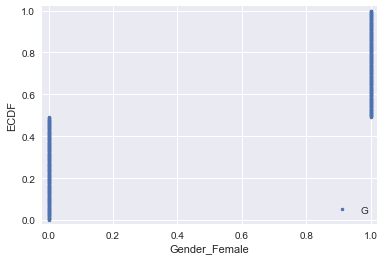

In [656]:
a, b = ecdf(df1['Gender_Female'])

# Generate plot
_ = plt.plot(a, b, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Gender_Female')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Gender_Female'), loc= 'lower right')

# Display the plot
plt.show()

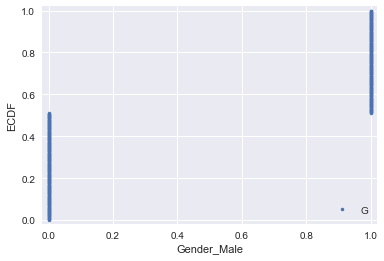

In [657]:
a, b = ecdf(df1['Gender_Male'])

# Generate plot
_ = plt.plot(a, b, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Gender_Male')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Gender_Male'), loc= 'lower right')

# Display the plot
plt.show()

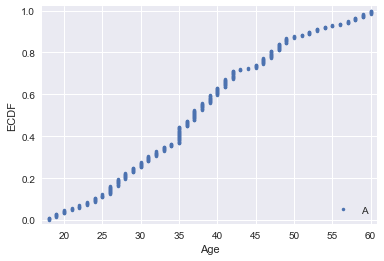

In [658]:
a, b = ecdf(df1['Age'])

# Generate plot
_ = plt.plot(a, b, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Age')
_ = plt.ylabel('ECDF')
_ = plt.legend(('Age'), loc= 'lower right')

# Display the plot
plt.show()

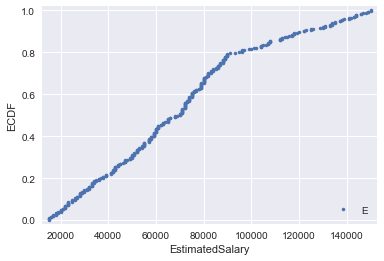

In [659]:
a, b = ecdf(df1['EstimatedSalary'])

# Generate plot
_ = plt.plot(a, b, marker='.', linestyle='none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('EstimatedSalary')
_ = plt.ylabel('ECDF')
_ = plt.legend(('EstimatedSalary'), loc= 'lower right')

# Display the plot
plt.show()

In [630]:
X.corr()

,Gender_Female,Gender_Male,Age,EstimatedSalary
Gender_Female,1.000000,-1.000000,0.073741,0.060435
Gender_Male,-1.000000,1.000000,-0.073741,-0.060435
Age,0.073741,-0.073741,1.000000,0.155238
EstimatedSalary,0.060435,-0.060435,0.155238,1.000000


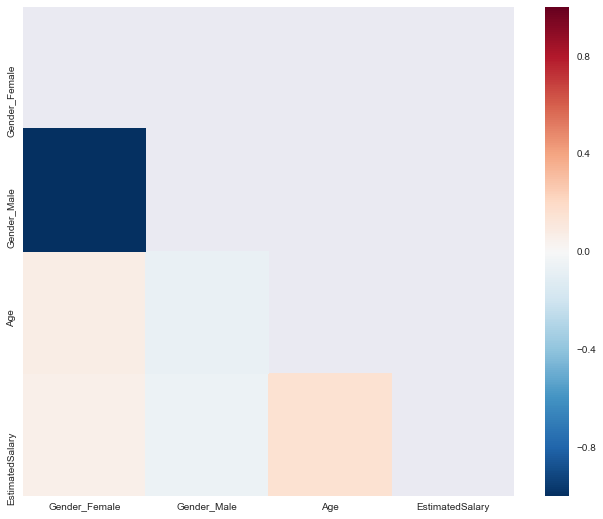

In [631]:
fig = plt.figure(figsize = (11,9))
mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(X.corr(), mask = mask);

### Feature Selection

In [635]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(X, y )
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True]
[1 1 1 1]


The Recursive Feature Elimination(RFE) tells us that there is no feature that can be eliminated from the index. 

### Implementing the Model

In [637]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Sun, 07 Jan 2018   Pseudo R-squ.:                  0.4711
Time:                        16:59:46   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
                                        LLR p-value:                 5.488e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Gender_Female     -12.7836      1.359     -9.405      0.000     -15.448     -10.120
Gender_Male   

All of the p-values are small therefore all are significant to the model.

### Logistic Regression Model Fitting

In [638]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predicting the test set results and calculating the accuracy

In [639]:
y_pred = logreg.predict(X_test)

In [640]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


### Cross Validation

In [641]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.657


### Confusion Matrix

In [642]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[79  0]
 [41  0]]


Confusion Matrix result shows us the we have 79+0 correct predictions and 41+0 incorrect predicitons.

### Accuracy

In [643]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.66


### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [644]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.66      1.00      0.79        79
          1       0.00      0.00      0.00        41

avg / total       0.43      0.66      0.52       120



From the entire set 43% of customers Purchased and 66% did not. 

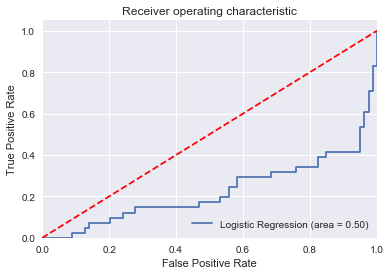

In [645]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Model can be better fit as this ROC curve indicates that this classifier is overfit as it is not a smooth curve. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000175C31BD550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000175C5634940>]], dtype=object)

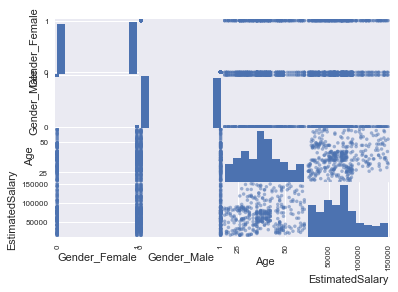

In [646]:
from pandas.tools import plotting
plotting.scatter_matrix(df1[cols]) 